In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
from google.colab import userdata
api_key = userdata.get('cos_api_key')

In [3]:
import pandas as pd
df_merged = pd.read_csv('/content/exchange_sun.csv')

# 환율의 중요성과 변동성

**환율은** 수출입, 외국인 투자, 물가 등 **국가 경제 전반에 영향**을 주는 핵심 변수.

최근 몇 년간 **환율이 1,400원을 돌파**하는 등 큰 변동을 보임 → 이를 **설명할 수 있는 요인**을 분석.

► 그중에서도 경제 심리지수(국민의 체감 경기)와 외환보유액(국가의 대외 지급 여력)를 반영하여 분석

## 1.원/달러환율 vs 외환보유액 vs 경제심리지수

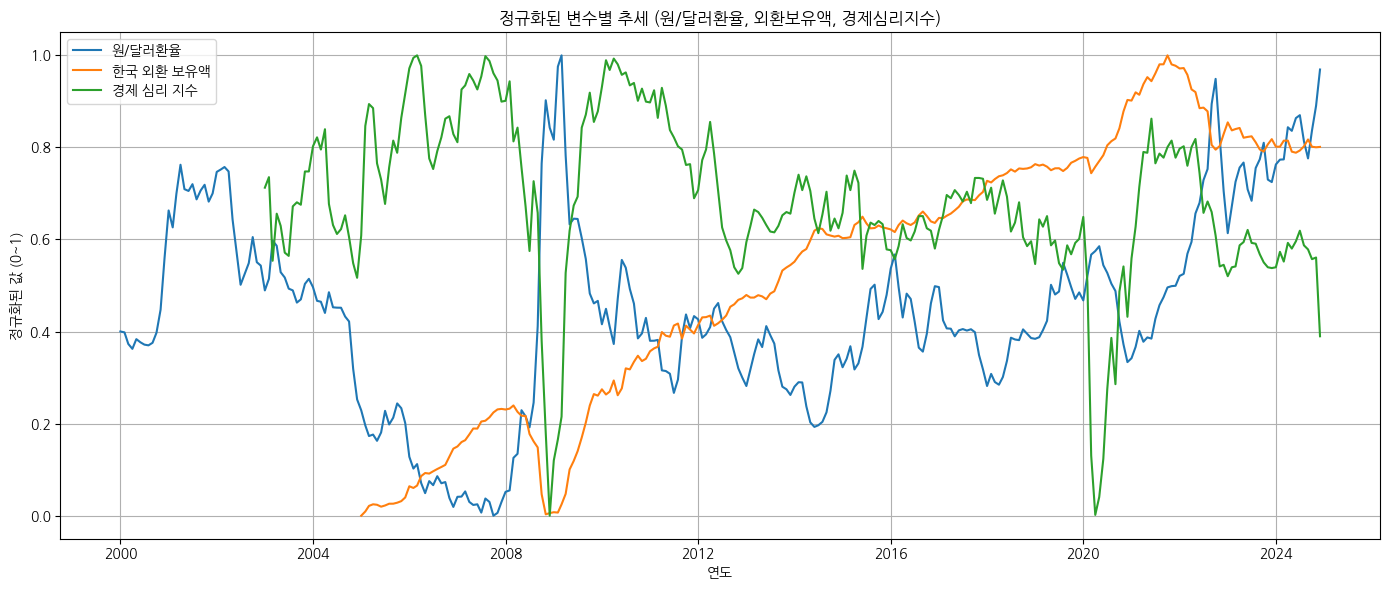

In [4]:
# 날짜 열을 datetime 형식으로 변환
df_merged["TIME"] = pd.to_datetime(df_merged["TIME"])

# 정규화 전용 복사본 생성
df_plot = df_merged[["TIME", "원/달러환율", "한국 외환 보유액", "경제 심리 지수"]].copy()

# 정규화 (0~1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_plot.iloc[:, 1:] = scaler.fit_transform(df_plot.iloc[:, 1:])

# TIME을 인덱스로 설정
df_plot.set_index("TIME", inplace=True)

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(df_plot.index, df_plot["원/달러환율"], label="원/달러환율")
plt.plot(df_plot.index, df_plot["한국 외환 보유액"], label="한국 외환 보유액")
plt.plot(df_plot.index, df_plot["경제 심리 지수"], label="경제 심리 지수")
plt.legend()
plt.title("정규화된 변수별 추세 (원/달러환율, 외환보유액, 경제심리지수)")
plt.xlabel("연도")
plt.ylabel("정규화된 값 (0~1)")
plt.grid(True)
plt.tight_layout()
plt.show()

- 2000~2007: 환율 안정 + 외환보유액 증가 + 심리지수 상승

- 2008~2009: 글로벌 금융위기 (서브프라임 모기지)

  - 환율 급등 (원화 가치 폭락) → 1,100원대 → 1,500원대까지 급등

  - 외환보유액 일시적 급감 → 원화 방어 위해 외환시장에 달러 공급

  - 경제심리지수 급락 → 금융 불안, 실물경제 침체 우려 급증

- 2010~2014: 회복기

  - 환율 하락 (원화 강세 회복) → 외환보유액 다시 상승세

  - 경제 심리지수도 개선 → 세계 경기 회복 + 삼성전자 등 수출 호조

  - 2013~14: 미국 테이퍼링 언급 → 신흥국 불안 → 약간의 변동은 있지만 한국은 외환 안정 유지

- 2015~2019: 안정기 & 미중무역전쟁

  - 환율은 비교적 안정적 흐름

  - 외환보유액은 계속 증가 → 한국은행의 지속적 보유 전략

  - 경제심리지수는 점차 하락세
  
    → 내수 둔화, 청년 실업, 저성장 우려
    
    → 2018년 미중 무역전쟁 여파로 대외 불확실성 확대


- 2020~2021: 코로나19 충격

  - 환율 급등 (2020 초반) → 글로벌 달러 수요 폭증

  - 경제 심리지수 급락 후 반등 → 팬데믹 공포 → 정부 부양책 발표 → 회복 기대감

  - 외환보유액은 방어적으로 유지

- 2022~2023: 고금리·고환율 시대

  - 환율 급등 → 미국 기준금리 급격한 인상으로 달러 강세

  - 외환보유액 감소 → 원화 방어 위해 달러 매도한 흔적

  - 경제 심리지수 하락 → 고물가 + 경기침체 우려 → 소비·투자 둔화

- 2024: 최근

  - 환율은 다시 상승세 → 긴축 종료 이후에도 고환율 지속

  - 외환보유액은 보합 혹은 소폭 감소

  - 경제 심리지수도 둔화 중 → 금리 인하 기대와 경기 불확실성 혼재









► 경제심리지수는 환율보다 **선행적으로 움직이는 경향**
→ **소비자·기업의 기대가 먼저 변화**

## 2.경제심리지수와 환율 변화

In [48]:
correlation = df_merged[["원/달러환율", "경제 심리 지수"]].corr().iloc[0, 1]
print(f"경제심리지수와 원/달러 환율의 상관계수: {correlation:.3f}")

경제심리지수와 원/달러 환율의 상관계수: -0.562


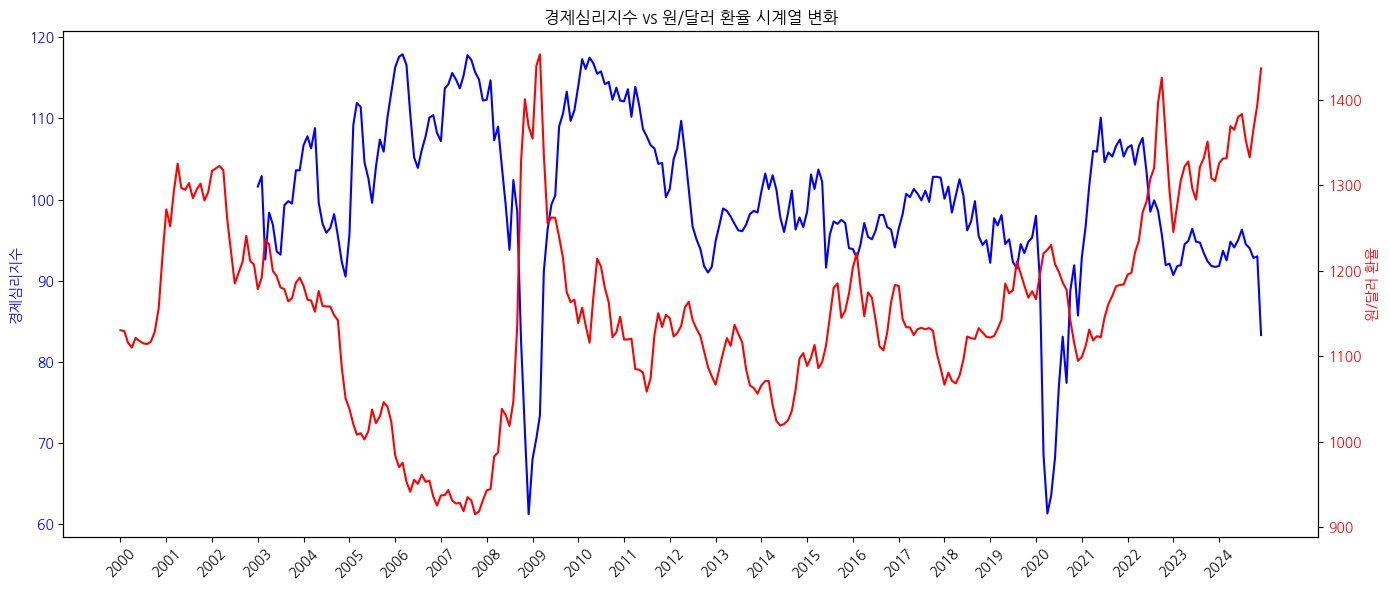

In [5]:
import matplotlib.pyplot as plt

# 'TIME'을 datetime으로 변환 (필요 시)
df_plot = df_merged.copy()
df_plot = df_plot.reset_index()  # TIME이 index에 있을 수도 있으므로 컬럼으로 옮김
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"].astype(str))  # Period → datetime 변환
df_plot["연도"] = df_plot["TIME"].dt.year

# 연도별 첫 번째 날짜만 사용해 x축 눈금 위치 설정
year_ticks = df_plot.groupby("연도")["TIME"].first().values
year_labels = df_plot["연도"].unique()

# 시각화
plt.figure(figsize=(14, 6))

# 축 1: 경제심리지수
ax1 = plt.gca()
ax1.plot(df_plot["TIME"], df_plot["경제 심리 지수"], color="blue", label="경제심리지수")
ax1.set_ylabel("경제심리지수", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# 축 2: 환율
ax2 = ax1.twinx()
ax2.plot(df_plot["TIME"], df_plot["원/달러환율"], color="red", label="원/달러 환율")
ax2.set_ylabel("원/달러 환율", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# x축 연도만 출력
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(year_labels, rotation=45)

plt.title("경제심리지수 vs 원/달러 환율 시계열 변화")
plt.tight_layout()
plt.show()

| 연도       | 주요 이벤트                     | 경제심리지수 반응      | 원/달러 환율 반응         |
|------------|----------------------------------|-------------------------|----------------------------|
| **2001**   | 9·11 테러                        | 급격한 심리 하락       | 환율 상승 (원화 약세)      |
| **2008~09**| 글로벌 금융위기                  | 급락                    | 급등 (1500원대 접근)       |
| **2010~12**| 유럽 재정위기                    | 불안정                  | 등락 (1100~1200원 사이)    |
| **2015~16**| 위안화 절하, 브렉시트(영국 유럽연합 탈퇴)           | 심리 약화               | 상승 (불안 심화)           |
| **2020**   | 코로나 팬데믹                    | 급락                    | 급등 (위기 시 원화 약세)   |
| **2022~23**| 美 기준금리 급등 (연준 긴축)     | 심리 위축 지속          | 1400원 돌파 (환율 급등)     |
| **2024**   | 긴축 완화 기대, 환율 안정 기조   | 반등 시도               | 완만한 하락세              |


### 2-1. 정말 2022~2023년 미국 기준금리 급등했는가?

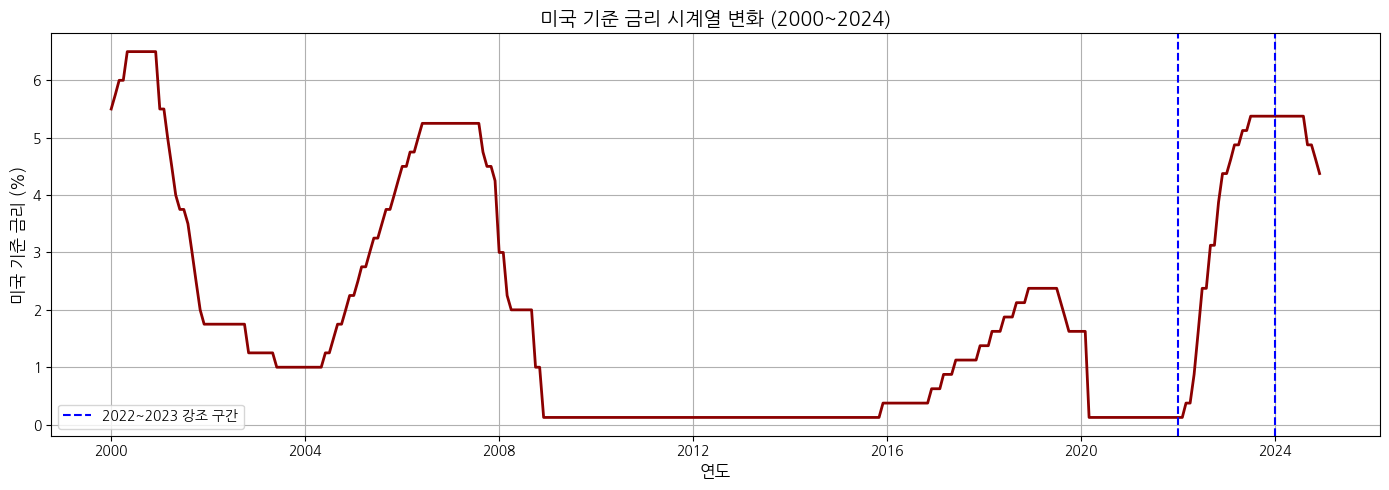

In [6]:
import matplotlib.pyplot as plt

# 시계열 시각화용 복사본
df_plot = df_merged.copy()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"])

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_plot["TIME"], df_plot["미국 기준 금리"], color='darkred', linewidth=2)

# 강조: 2022년과 2023년 구간 세로선 추가
plt.axvline(pd.Timestamp("2022-01-01"), color='blue', linestyle='--', linewidth=1.5, label='2022~2023 강조 구간')
plt.axvline(pd.Timestamp("2023-12-31"), color='blue', linestyle='--', linewidth=1.5)

# 꾸미기
plt.title("미국 기준 금리 시계열 변화 (2000~2024)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("미국 기준 금리 (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2-2. 펜데믹 전후의 변수 변화는 어떨까?

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 팬데믹 기준 나누기
pre_covid = df_merged[df_merged["TIME"] < "2020-01"]
post_covid = df_merged[df_merged["TIME"] >= "2020-01"]

<ipython-input-11-e5e888e1347f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-11-e5e888e1347f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-11-e5e888e1347f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


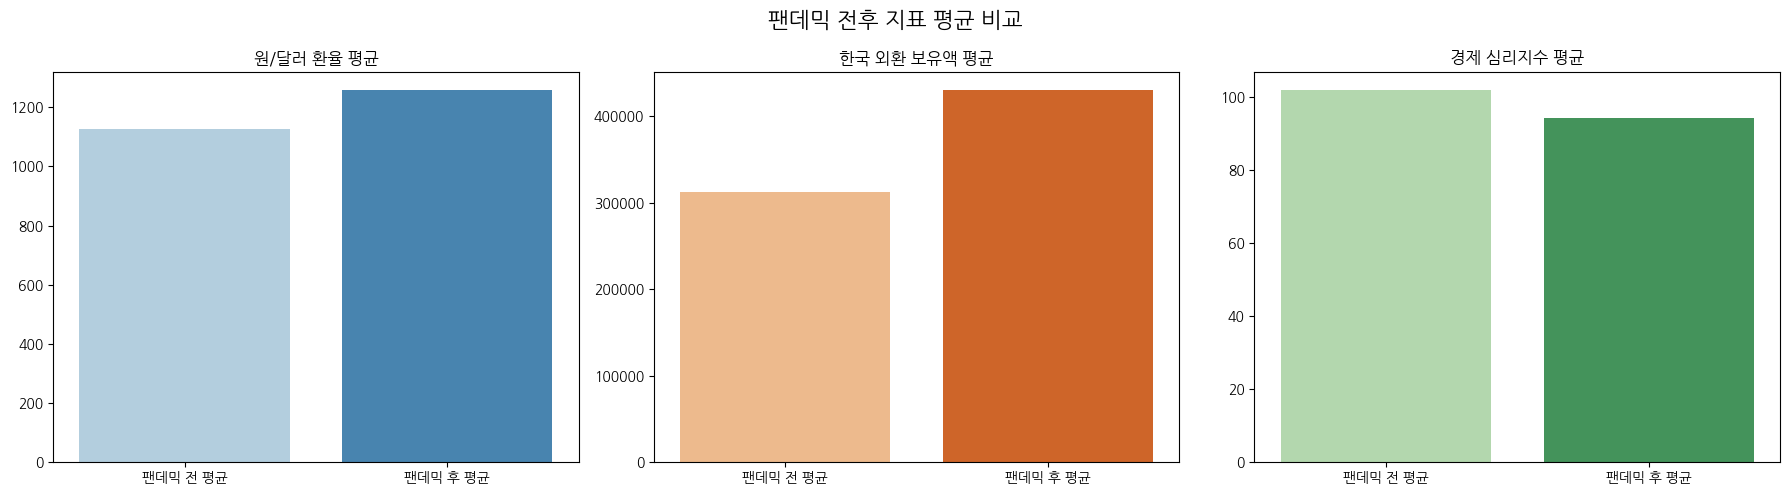

In [11]:
# 평균값 계산
compare_df = pd.DataFrame({
    "지표": ["원/달러환율", "한국 외환 보유액", "경제 심리 지수"],
    "팬데믹 전 평균": [
        pre_covid["원/달러환율"].mean(),
        pre_covid["한국 외환 보유액"].mean(),
        pre_covid["경제 심리 지수"].mean()
    ],
    "팬데믹 후 평균": [
        post_covid["원/달러환율"].mean(),
        post_covid["한국 외환 보유액"].mean(),
        post_covid["경제 심리 지수"].mean()
    ]
})

# 서브플롯으로 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ["원/달러 환율 평균", "한국 외환 보유액 평균", "경제 심리지수 평균"]
colors = ["Blues", "Oranges", "Greens"]

for i, indicator in enumerate(compare_df["지표"]):
    sns.barplot(
        data=pd.melt(compare_df[compare_df["지표"] == indicator],
                     id_vars="지표", var_name="시기", value_name="값"),
        x="시기", y="값", ax=axes[i], palette=colors[i]
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("팬데믹 전후 지표 평균 비교", fontsize=16)
plt.tight_layout()
plt.show()

- 원달러 환율 평균 상승 : 미 금리 인상과 더불어 글로벌경기 불확실성 영향

- 한국 외환보유액 상승 : 무조건 펜데믹 때문이라고 보긴 어렵지만,
위기대응력 강화위하여 외환 보유액 확대

- 경제심리지수 하락 : 펜데믹 이후 경제 불확실성/ 심리적 위축 가능성

### 2-3. 정책적 이슈들에서 경제심리지수의 변화

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# TIME 컬럼을 datetime으로 변환 (필요 시)
df_plot = df_merged.copy()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"].astype(str))  # Period → datetime 변환

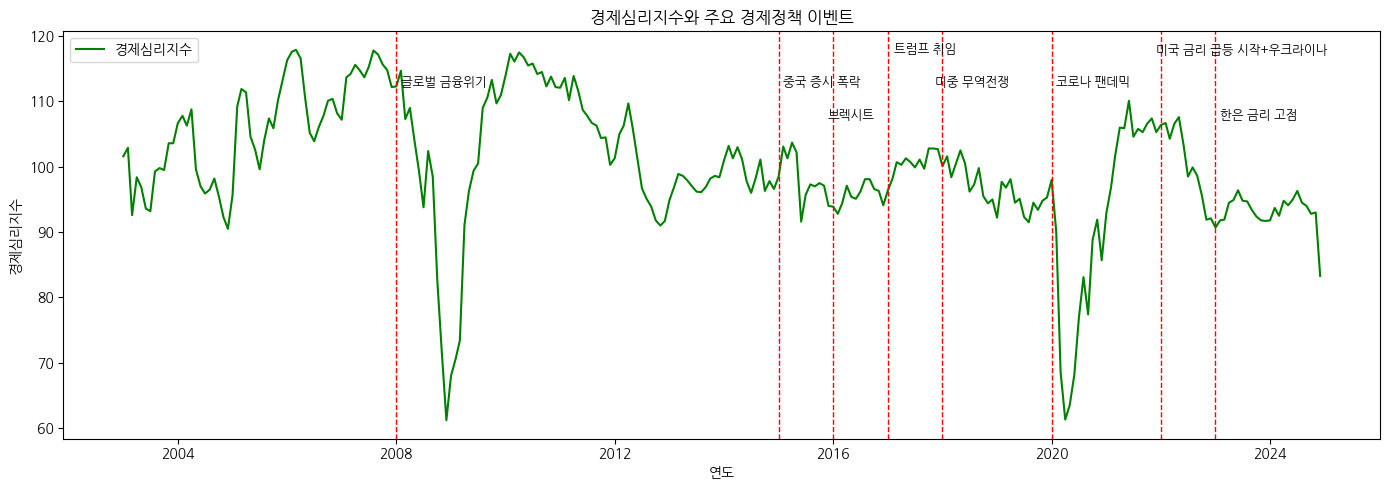

In [13]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_plot, x="TIME", y="경제 심리 지수", color="green", label="경제심리지수")
plt.title("경제심리지수와 주요 경제정책 이벤트")
plt.xlabel("연도")
plt.ylabel("경제심리지수")

# 주요 이벤트 추가
event_years = {
    "2008": "글로벌 금융위기",
    "2015": "중국 증시 폭락",
    "2016": "브렉시트",
    "2017": "트럼프 취임",
    "2018": "미중 무역전쟁",
    "2020": "코로나 팬데믹",
    "2022": "미국 금리 급등 시작+우크라이나",
    "2023": "한은 금리 고점"
}

# y축 기준점 설정
y_base = df_plot["경제 심리 지수"].max() - 5

# 라벨 위치 조정 사전 설정
label_offsets = {
    "2008": (30, 0),
    "2015": (30, 0),
    "2016": (-40, -5),
    "2017": (40, 5),
    "2018": (-50, 0),
    "2020": (30, 0),
    "2022": (-30, 5),
    "2023": (30, -5)
}

# 이벤트 선 및 라벨 표시
for year, label in event_years.items():
    event_date = pd.to_datetime(f"{year}-01-01")
    x_offset, y_offset = label_offsets[year]

    plt.axvline(event_date, color='red', linestyle='--', linewidth=1)
    plt.text(event_date + pd.DateOffset(days=x_offset),
             y_base + y_offset,
             label,
             rotation=0,
             verticalalignment='center',
             fontsize=9,
             color='black')

plt.tight_layout()
plt.show()


|시점 | 이벤트 | 경제심리지수 반응 | 해석|
|-------|----------|----------|-----|
2008년 | 글로벌 금융위기 | 급락 (역대 최저 수준) | 서브프라임 모기지 사태 → 리먼 브라더스 파산 → 글로벌 금융 시스템 불안감 폭발. 국민들의 경제적 불안이 크게 반영된 시점.
2015년 | 중국 증시 폭락 | 다소 하락 후 회복 | 한국 경제의 대중 의존도가 크기 때문에 불안감 반영. 다만 대폭락은 아님.
2016년 | 브렉시트 (영국 EU 탈퇴) | 크게 반응 없음 | 국내에 직접적인 영향보다는 세계 경제 불확실성 측면. 경제 주체들이 크게 동요하진 않았음.
2017년 | 트럼프 취임 | 약간 하락 | 보호무역주의 및 외교 불확실성 우려. 반면 주가 상승 기대도 일부 존재.
2018년 | 미중 무역전쟁 본격화 | 서서히 하락 | 교역 위축 우려 → 장기적인 불확실성 영향. 기업 및 소비자 모두 점진적 불안감 반영.
2020년 | 코로나 팬데믹 | 급락 (2008년과 유사 수준) | 팬데믹 충격, 이동 제한, 실물경제 침체에 대한 우려로 단기간 내 급격한 심리 위축.
2022년 | 미국 금리 급등 + 우크라이나 전쟁 | 하락세 지속 | 두 사건 모두 불확실성과 경기 침체 우려 증폭 → 소비 및 투자 심리 위축.
2023년 | 한국 기준금리 고점 도달 | 일시적 반등 후 정체 | "더 이상 오르지 않을 것"이라는 금리 피크 아웃 기대감 반영. 경기 회복 기대가 나타났지만 큰 전환은 없었음.

**요약**

  - 2008 금융위기, 2020 코로나는 급락 → 실물경제에 대한 직접적인 타격.
  - 그 외는 점진적 하락 혹은 미미한 반응.

  - 2022년 미국 금리 급등 때는 심리지수 하락 지속.

  - 2023년 한국 금리 고점 도달은 일시적인 심리 회복 기대감을 유도 → 금리 인하 기대 때문.

      
      금리 고점?
        → 금리 인상 고점에 도달했다는 건 더 이상 금리를 올리지 않을 가능성이 커졌다는 뜻 (“최악은 지나갔다”는 심리 반영)
        
        아직 실제 금리 인하가 시작되지 않았어도, 기대 심리만으로 경제심리지수가 반등할 수 있음.(일시적)

        만약 실제로 발생하지 않는다면 금세 경제 심리지수 하락

  - 정책 전환의 "신호" 자체가 경제심리에 강하게 작용

### 2-5. 기대인플레이션율도 경제심리지수와 원/달러 환율에 영향을 미칠까?

기대인플레이션율 : 앞으로 1년간 얼마나 물가가 오를지

- ⬆︎ : 금리 인상 가능성이 커지고, 환율도 불안정 가능성

- ⬇︎ : 경기 둔화, 물가 안정 신호로 해석 가능

In [31]:
import pandas as pd
import requests

stat_code = '511Y003'     # 기대인플레이션율 (전국, 월)
item_code = 'FMB'         # 향후 1년 기대인플레이션율
start_date = '200808'     # 데이터 시작: 2008년 8월
end_date = '202503'       # 최신 데이터까지

# API URL 구성
url = f'https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/1000/{stat_code}/M/{start_date}/{end_date}/{item_code}'

# 요청
response = requests.get(url)
data = response.json()

# 데이터프레임 구성
if 'StatisticSearch' in data:
    rows = data['StatisticSearch']['row']
    df_expectation = pd.DataFrame(rows)
    df_expectation = df_expectation[['TIME', 'DATA_VALUE']]
    df_expectation.columns = ['TIME', '기대인플레이션율']
    df_expectation['TIME'] = pd.to_datetime(df_expectation['TIME'], format='%Y%m')
    df_expectation['기대인플레이션율'] = df_expectation['기대인플레이션율'].astype(float)
    print(df_expectation.head())
else:
    print("API 오류:", data)

        TIME  기대인플레이션율
0 2008-08-01       4.2
1 2008-09-01       4.5
2 2008-10-01       4.6
3 2008-11-01       4.5
4 2008-12-01       4.3


In [32]:
# TIME 형식을 datetime으로 변환 (df_merged)
df_merged['TIME'] = pd.to_datetime(df_merged['TIME'])

# 이제 병합
df_combined = pd.merge(df_merged, df_expectation, on='TIME', how='left')

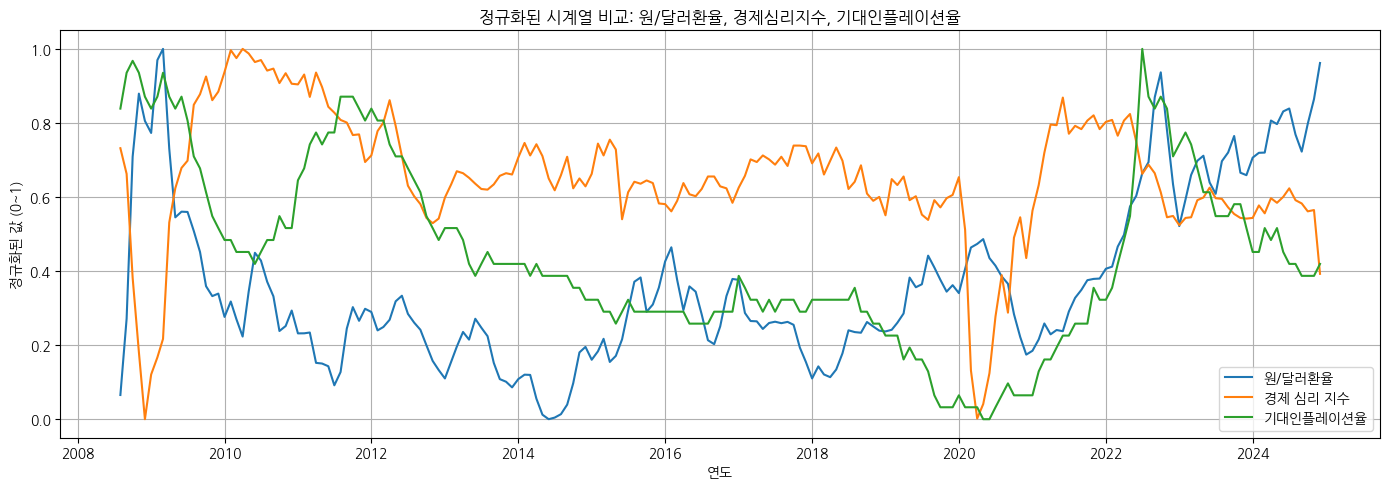

In [33]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 그래프용 복사본 생성
plot_df = df_combined[['TIME', '원/달러환율', '경제 심리 지수', '기대인플레이션율']].dropna()

# 정규화 (0~1 범위로 스케일링)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(plot_df[['원/달러환율', '경제 심리 지수', '기대인플레이션율']])
scaled_df = pd.DataFrame(scaled, columns=['원/달러환율', '경제 심리 지수', '기대인플레이션율'])
scaled_df['TIME'] = plot_df['TIME'].values

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(scaled_df['TIME'], scaled_df['원/달러환율'], label='원/달러환율')
plt.plot(scaled_df['TIME'], scaled_df['경제 심리 지수'], label='경제 심리 지수')
plt.plot(scaled_df['TIME'], scaled_df['기대인플레이션율'], label='기대인플레이션율')
plt.title("정규화된 시계열 비교: 원/달러환율, 경제심리지수, 기대인플레이션율")
plt.xlabel("연도")
plt.ylabel("정규화된 값 (0~1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**해석**

1. 2008~2009: 글로벌 금융위기 직후

  - 경제심리지수 급락 → 소비자 심리가 급격히 위축된 시기

  - 환율 급등 → 외환시장 불안, 원화가치 하락

  - 기대인플레이션율도 상승 → 향후 물가 상승 예상, 불확실성 반영

2. 2012~2015: 안정기

  - 경제심리지수는 점진적 회복 → 경기 회복 기대감

  - 환율과 기대인플레이션율은 모두 하락세 → 대체로 안정적 물가 및 환율 수준

3. 2016~2018: 미중 무역전쟁 & 정치적 리스크

  - 기대인플레이션율은 서서히 하락 → 물가 안정 기대

  - 경제심리지수도 하락세로 전환 → 무역 불확실성, 글로벌 리스크 반영

  - 환율은 상대적으로 안정적

  : 기대인플레이션율과 심리지수는 비슷한 경향 : 경기 둔화 예상

4. 2020: 코로나 팬데믹

  - 경제심리지수 폭락 → 사상 최저 수준

  - 환율 급등 → 안전자산 선호, 원화 약세

  - 기대인플레이션율도 최저 수준 도달 → 소비심리 위축, 물가 우려 약화

  : 셋 다 동반 하락으로 경제 침체 명확

5. 2022~2023: 고물가 & 고금리 시대

  - 환율 급등 → 미국 금리 인상, 원화 약세

  - 기대인플레이션율 급상승 → 향후 물가 상승 강하게 인식됨

  - 경제심리지수는 오히려 반등했다가 다시 하락 → 일시적 기대감이 있었던 것으로 보임

  : 세 지표의 방향이 잠시 갈리며 해석이 복잡


6. 2023 후반~2024: 금리 고점 도달 및 기대 반영

  - 기대인플레이션율은 하락세 전환 → 물가 안정 기대

  - 경제심리지수는 하락 → 체감 경기 회복 부진

  - 환율은 조금 하락했다가 다시 상승 → 불안정한 글로벌 요인(우크라이나전쟁등) 지속





### 2-6. 경제심리지수가 높아지면 외국인 투자금액이 상승할까?

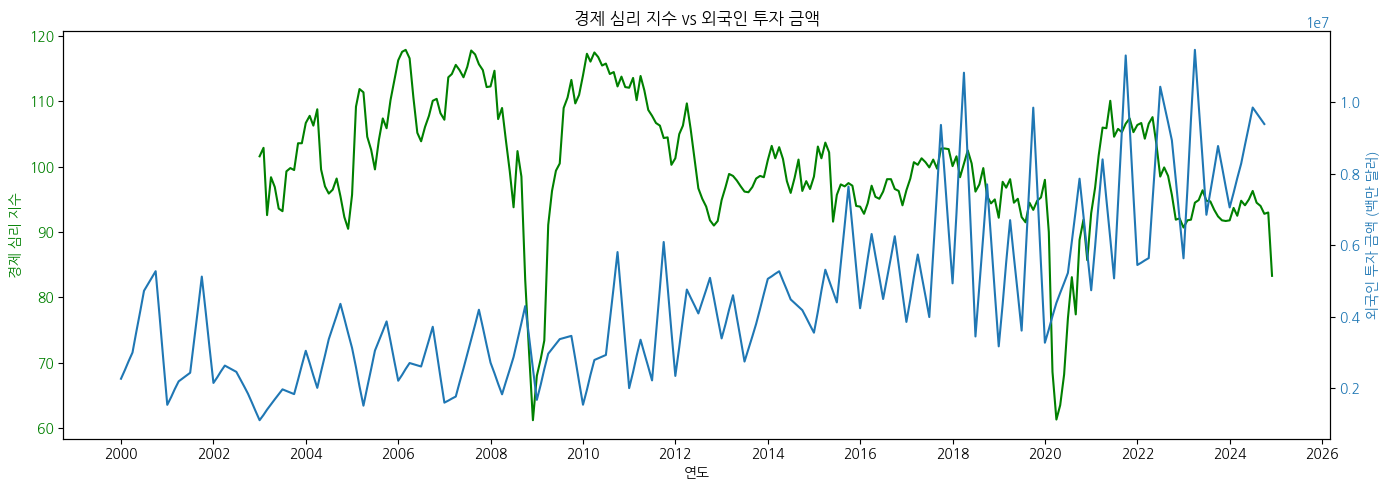

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 시간 형식 처리
df_merged["TIME"] = pd.to_datetime(df_merged["TIME"])

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(14, 5))

# 왼쪽 y축: 경제 심리 지수
color = "green"
ax1.set_xlabel("연도")
ax1.set_ylabel("경제 심리 지수", color=color)
ax1.plot(df_merged["TIME"], df_merged["경제 심리 지수"], color=color, label="경제 심리 지수")
ax1.tick_params(axis='y', labelcolor=color)

# 오른쪽 y축: 외국인 투자 금액
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("외국인 투자 금액 (백만 달러)", color=color)
ax2.plot(df_merged["TIME"], df_merged["외국인 투자 금액"], color=color, label="외국인 투자 금액")
ax2.tick_params(axis='y', labelcolor=color)

# 연도 단위 x축 포맷 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(2))  # 2년 간격
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 제목 및 레이아웃
plt.title("경제 심리 지수 vs 외국인 투자 금액")
fig.tight_layout()
plt.show()

| 구간        | 경제심리지수 | 외국인투자금액 | 특징                             |
|-------------|----------------|------------------|----------------------------------|
| 2000~2007   | 상승           | 유지/증가         | 안정 성장기                       |
| 2008        | 급락           | 급감              | 글로벌 금융위기 충격              |
| 2010~2015   | 회복세         | 증가              | 외자 유입 회복                   |
| 2018 이후   | 하락           | 변동 중 증가       | 미중 무역, 코로나, 고금리 혼재     |
| 2022~2024   | 지속 하락       | 증가              | 실물심리 악화 vs 자본 유입        |


* 2022-2023년의 경우

  경기 체감은 악화되었지만,

  고금리 환경과 환차익 기대 등으로 외국인 자금은 유입되는 모습.

  심리가 실제 자금 흐름과 꼭 일치하지는 않음을 보여줌.


* 특히 , 고금리/환율 이슈가 외자 유입을 자극하는 경우, 심리와 반대 흐름도 가능

  - 고금리 상황:

    한국이 기준금리를 높이면, 금리 차익을 노리는 외국인 투자자들이 자금을 한국에 투자하려고 함.
  → 외국인 투자금액 증가

  - 환율 상승(원화 약세):

    달러 대비 원화 가치가 떨어지면, 외국인 입장에서는 상대적으로 싸게 투자할 수 있는 기회.

#### 경제심리지수& 외국인투자금액 상관관계

In [ ]:
corr_1 = df_merged[["외국인 투자 금액", "경제 심리 지수"]].corr().iloc[0, 1]
print(f"외국인 투자 금액과 경제 심리지수 간 상관계수: {corr_1:.3f}")

외국인 투자 금액과 경제 심리지수 간 상관계수: -0.250


약하지만 심리지수와 반대 흐름을 보이는 것을 확인할 수 있다.

원화 약세가 투자에는 장점이 될 가능성이 있음.

### 2-7. 외국인투자금액이 늘면 외화보유액도 같이 상승할까?

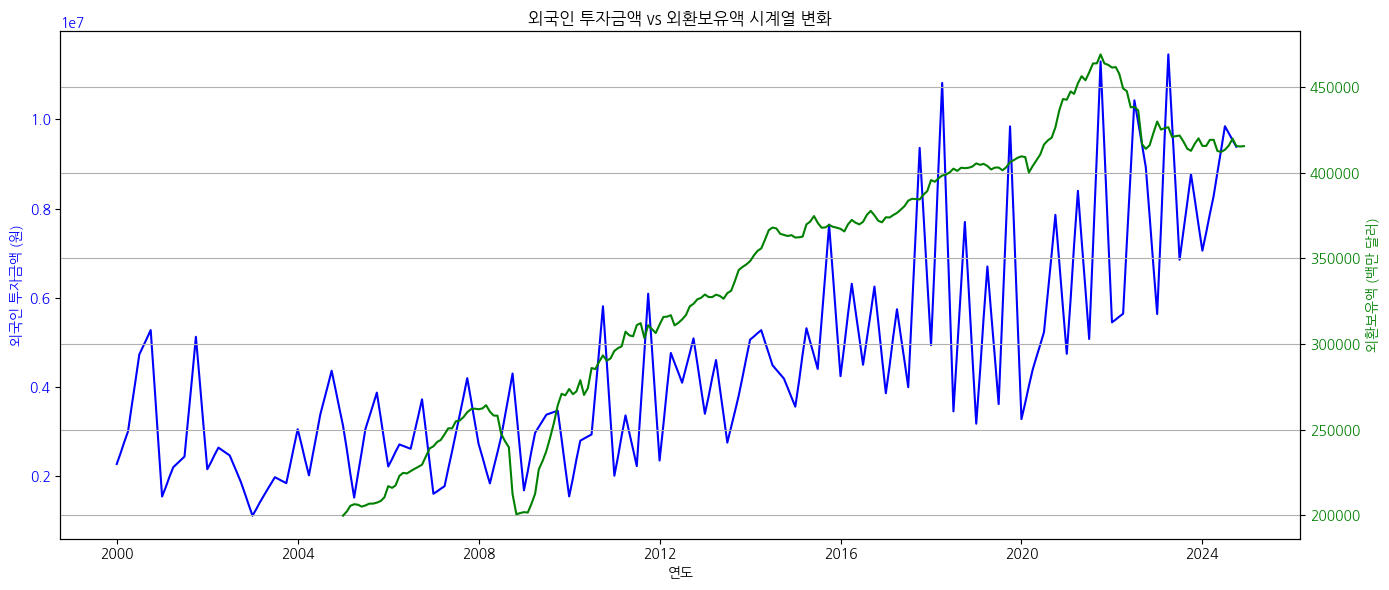

In [35]:
import matplotlib.pyplot as plt

# 데이터프레임 복사 및 시간 변환
df_plot = df_merged.copy()
df_plot = df_plot.reset_index()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"].astype(str))

# 시각화
plt.figure(figsize=(14, 6))

# 축 1: 외국인 투자금액
ax1 = plt.gca()
ax1.plot(df_plot["TIME"], df_plot["외국인 투자 금액"], color="blue", label="외국인 투자금액")
ax1.set_ylabel("외국인 투자금액 (원)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# 축 2: 외환보유액
ax2 = ax1.twinx()
ax2.plot(df_plot["TIME"], df_plot["한국 외환 보유액"], color="green", label="한국 외환보유액")
ax2.set_ylabel("외환보유액 (백만 달러)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# x축 설정
ax1.set_xlabel("연도")
plt.title("외국인 투자금액 vs 외환보유액 시계열 변화")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
corr_2 = df_merged[["외국인 투자 금액", "한국 외환 보유액"]].corr().iloc[0, 1]
print(f"외국인 투자 금액과 외환보유액 간 상관계수: {corr_2:.3f}")

외국인 투자 금액과 외환보유액 간 상관계수: 0.769


그래프에서 외환보유액(초록색)은 전체적으로 꾸준한 상승세를 보이며,

외국인 투자금액(파란색)은 변동성이 크지만, 장기적으로는 우상향

➔ 즉 외국인 투자 유입이 직접적인 외환보유액 확대 요인으로 작용

? 그렇다면 원화가 약세할수록 외국인 투자 증가하고 외국인 투자 증가하면 외환보유액이 느는 수순?

→ 외환보유액이 증가한다고 환율이 하락, 즉 원화가 강세하지 않는 것을 알 수 있음.

## 3.외환보유액과 환율변화

### 3-1. 원/달러 환율 vs 외환보유액 시계열 그래프

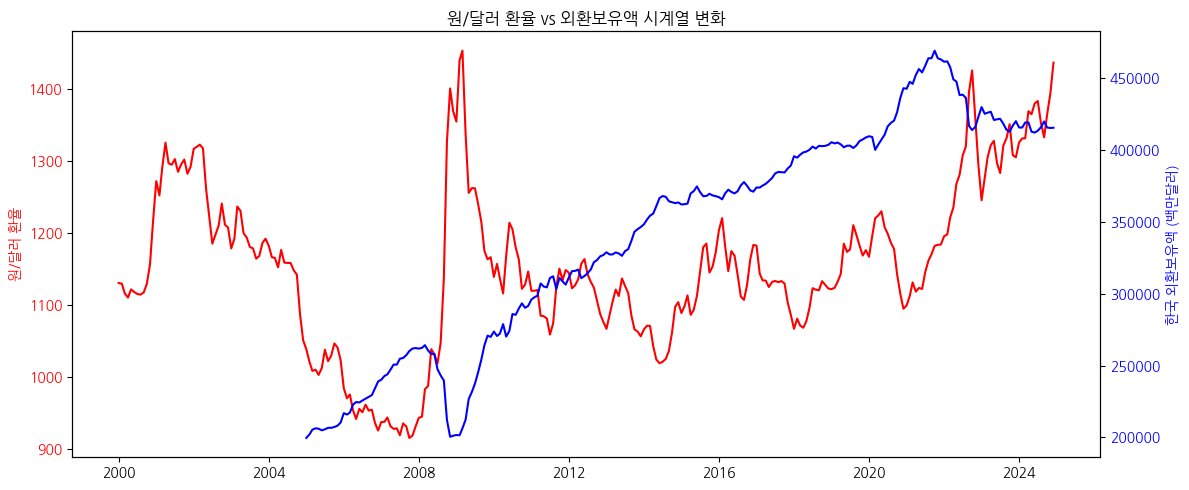

In [37]:
plt.figure(figsize=(12, 5))

# 축1: 원/달러 환율
ax1 = plt.gca()
ax1.plot(df_combined["TIME"], df_combined["원/달러환율"], color="red", label="원/달러 환율")
ax1.set_ylabel("원/달러 환율", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# 축2: 외환보유액
ax2 = ax1.twinx()
ax2.plot(df_combined["TIME"], df_combined["한국 외환 보유액"], color="blue", label="외환보유액")
ax2.set_ylabel("한국 외환보유액 (백만달러)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("원/달러 환율 vs 외환보유액 시계열 변화")
plt.xlabel("연도")
plt.tight_layout()
plt.show()

### 3-2. 정책적 이슈가 영향을 미쳤을까? (환율&외환보유액)

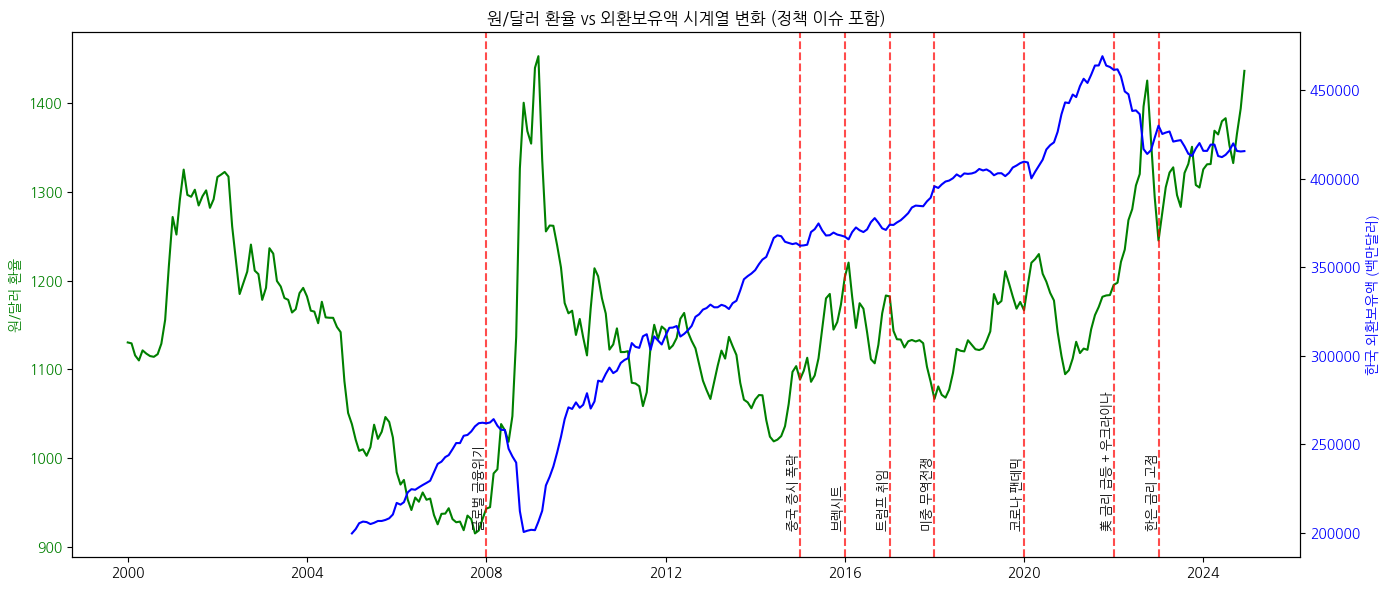

In [50]:
plt.figure(figsize=(14, 6))

# 축 1: 원/달러 환율
ax1 = plt.gca()
ax1.plot(df_merged["TIME"], df_merged["원/달러환율"], color="green", label="원/달러 환율")
ax1.set_ylabel("원/달러 환율", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# 축 2: 외환보유액
ax2 = ax1.twinx()
ax2.plot(df_merged["TIME"], df_merged["한국 외환 보유액"], color="blue", label="한국 외환보유액")
ax2.set_ylabel("한국 외환보유액 (백만달러)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# 정책 이벤트
event_lines = {
    "2008": "글로벌 금융위기",
    "2015": "중국 증시 폭락",
    "2016": "브렉시트",
    "2017": "트럼프 취임",
    "2018": "미중 무역전쟁",
    "2020": "코로나 팬데믹",
    "2022": "美 금리 급등 + 우크라이나",
    "2023": "한은 금리 고점"
}

# y축 최상단값 추정 (글씨 위치 잡기용)
y_pos = ax1.get_ylim()[0] + (ax1.get_ylim()[1] - ax1.get_ylim()[0]) * 0.05

for year, label in event_lines.items():
    date = pd.to_datetime(f"{year}-01-01")
    ax1.axvline(date, color='red', linestyle='--', alpha=0.7)

    # 아래쪽에 가로쓰기, 회전 없이
    ax1.text(date, y_pos, label,
             rotation=90, fontsize=9, color='black',
             ha='right', va='bottom')  # 수평정렬, 수직정렬

# 제목 및 마무리
plt.title("원/달러 환율 vs 외환보유액 시계열 변화 (정책 이슈 포함)")
plt.tight_layout()
plt.show()

| 시기            | 주요 이벤트                | 원/달러 환율 (초록)       | 외환보유액 (파랑)         | 해석 요약 |
|------------------|-----------------------------|-----------------------------|-----------------------------|------------|
| **2008년**      | 글로벌 금융위기           | 급등 (~1500원)             | 일시적 하락 후 급반등     | 금융위기 불안 → 환율 급등, 이후 외화 방어 목적의 보유 확대 |
| **2015년**      | 중국 증시 폭락            | 소폭 상승                  | 큰 영향 없음               | 아시아 불안에 따른 심리 위축 반영 |
| **2016년**      | 브렉시트                   | 영향 크지 않음             | 안정적 증가세 지속         | 유럽발 충격이나 외환시장엔 제한적 |
| **2017년**      | 트럼프 취임               | 보합 또는 소폭 상승        | 외환보유 증가 지속         | 정책 불확실성 반영, 환율 영향 미미 |
| **2018년**      | 미중 무역전쟁             | 점진적 상승                | 완만한 증가                | 무역 불확실성 반영으로 환율 점진적 상승 |
| **2020년**      | 코로나 팬데믹             | 급등 (~1300원대)           | 보유액 급증                | 위기 시기 외환방어·안정 목적 확충 |
| **2022년**      | 美 금리 급등 + 우크라이나 | 환율 급등 (~1400원 이상)   | 외환보유액 감소 후 회복    | 안전자산 회귀+원화 약세에 따른 급등, 보유액 사용 시점 |
| **2023년**      | 한은 기준금리 고점        | 하락 후 재반등              | 소폭 감소                   | 금리정책 기대감이 반영되나, 하반기 환율 재상승 |


**❗️공통된 특이점 : 환율 상승 + 외환보유액 하락**

지금까지 위기상황(환율상승/원화약세)에서 외환보유액이 증가하는 것을 볼 수 있었음. 하지만 세 시기는 특이해보임.

|시기|	환율 변화	|외환보유액 변화	|특징 요약|
|---|--------|------------------|-------|
|2008 글로벌 금융위기|	급등 (원화가치 폭락)|	급락 (외환시장 개입)	|위기 초반 외환유출과 방어 개입으로 보유액 감소|
|2022 美 금리 급등 + 우크라이나	|급등 (달러 초강세 + 지정학 리스크)	|하락 (보유액 활용 + 평가 손실)|	고금리·전쟁 복합 요인, 방어 목적 외환 사용|
|2023년 고금리 피크|	재상승	|소폭 감소	|외자 유입 둔화 + 고환율 유지로 방어 부담 증가|

<br>

하지만!! **2023년 이후는 조금 다름**

환율은 살짝 반락했다가 다시 재상승 (2024 들어서도 고공행진)

외환보유액은 완전히 회복되지는 않음, 4100~4200억 달러 수준에서 횡보

→ **환율도 계속 상승 외환보유액은 회복하지 못함**

<br>

► 즉, 보유액이 회복세로 전환되지 않은 이유 추정

  - 글로벌 달러 강세가 계속됨 → 방어 부담 지속

  - 무역수지 개선에도 불구하고 외자 유입 둔화

  - 한은이 빠르게 외환보유액을 다시 쌓을 여유가 없음 → 신중한 방어 지속 중

**결론**

결국 일반적인 패턴은 환율이 상승할 때 중앙은행이 외환보유액을 적절히 조절하면서 시장에 개입하게 됨.

→ 결과적으로 환율 안정 + 보유액 감소 → 이후 보유액 점진적 회복

🥲 2023년이후로는 외환보유액과 환율모두 회복하지 못하고 있음

- 환율 : 상승 후 높은 수준 지속
- 외환보유액 : 감소 이후 회복 정체기
- 외자 유입 : 유입둔화
- 방어정책(중앙은행개입) : 효과 제한적

**"왜 이런현상이 나타났을까?"**

1. 미국 고금리 장기화 → 달러 강세 지속 → 환율 고공 유지

2. 무역수지 흑자에도 불구하고 외자유입이 약함 → 투자심리 회복이 더딤

3. 한국의 금리 인상 여력이 제한적 → 금리 차 축소 어려움 → 환율 하락 제약

4. 한은의 외환시장 개입도 점진적 → 공격적 방어보다는 안정적 관리 지향



### 3-3. 원/달러 환율 vs 외환보유액 산점도

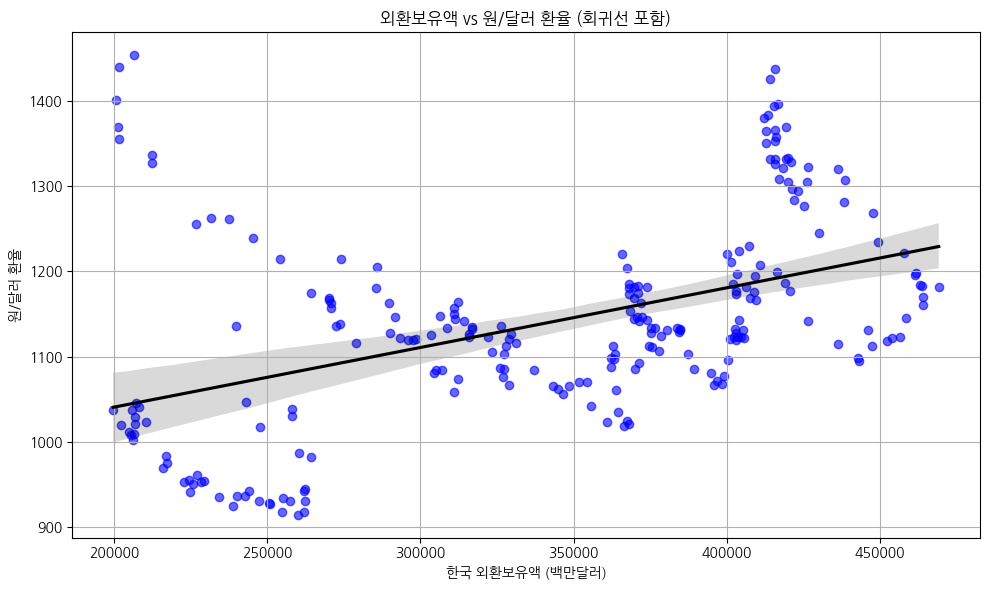

In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_combined,
    x="한국 외환 보유액", y="원/달러환율",
    color="blue", scatter_kws={'alpha':0.6}, line_kws={"color": "black"}
)

plt.title("외환보유액 vs 원/달러 환율 (회귀선 포함)")
plt.xlabel("한국 외환보유액 (백만달러)")
plt.ylabel("원/달러 환율")
plt.grid(True)
plt.tight_layout()
plt.show()

- 산점도에서의 이상치
  
  - 환율이 1400원 이상이면서 외환보유액이 매우 높은 지점들 (우상단)
    
    → 2022년~2023년 고환율 + 외환보유액 고점 구간
    
    → 이 시기는 미국 긴축(금리 인상) + 우크라이나 전쟁 여파로 원화가치 하락이 가속됐던 때

  - 환율이 낮고 외환보유액도 낮은 구간 (좌하단)

    → 2000년대 초반 자료(외환보유액이 20~25만 수준일 때 환율이 900원대인 시기)

    → 아직 글로벌 위기 대응 프레임이 약했던 시기

  - 환율은 높고 외환보유액은 적은 구간(좌상단)

    → 외부 충격이 매우 강했던 구간

    → 2008 금융위기 당시로 보임

  - 우하단 쪽은 보유액이 많고 환율은 하락하는 이상적인 구간
    

- 인터렉티브하게 이상치 확인

In [53]:
import plotly.express as px

fig = px.scatter(
    df_combined,
    x='한국 외환 보유액',     # 공백 있는 정확한 컬럼명 사용
    y='원/달러환율',
    hover_data=['TIME', '한국 외환 보유액', '원/달러환율'],      # 마우스 오버 시 날짜 확인
    trendline='ols',
    title="외환보유액 vs 원/달러 환율 (Hover로 시기 확인)",
    labels={
        '한국 외환 보유액': '한국 외환보유액 (백만달러)',
        '원/달러환율': '원/달러 환율'
    }
)

fig.update_traces(marker=dict(color='blue', size=6))
fig.show()


|위치	|시기 (대략)	|특이점 설명|
|-----|--------|------------|
|좌상단	|2009년 전후|	외환보유액은 상대적으로 낮은데 환율이 비정상적으로 높음 → 2008 글로벌 금융위기 여파로 환율 급등, 하지만 외환보유액 축적은 아직 덜 됨|
|좌하단	|2007~2008년 초| 외환보유액도 낮고 환율도 낮음→ 위기 직전 시기, 상대적 안정기|
|우상단	|2022~2023년	|외환보유액은 많은데 환율이 높음 → 정책적 방어에도 **글로벌 요인(VIX, 금리차 등)**으로 환율이 고점 유지되는 예외적 구간|

#### 외환보유액과 원/달러 환율의 상관관계

In [39]:
correlation = df_combined[["원/달러환율", "한국 외환 보유액"]].corr().iloc[0, 1]
print(f"외환보유액과 원/달러 환율의 상관계수: {correlation:.3f}")

외환보유액과 원/달러 환율의 상관계수: 0.456


**상관계수 0.456** → 중간 정도의 양의 상관관계

➔ 예상과 다르게, 외환보유액이 많다고 환율이 반드시 낮아지는 것 아님

외환보유액은 선제적 방어 수단이기 때문에, 환율이 급등한 뒤 보유액이 늘어나는 반응성 특징이 있음.

또한, 외국인 투자자금 유입 등 외부 요인에 의해 환율과 외환보유액이 동시에 움직일 수도 있음.



### 가설 흐름

1. 경제심리지수: 환율의 선행 또는 동반 지표


    "가설 1: 경제심리지수가 하락할수록 환율은 상승한다."

      이는 심리적 불안 → 외화 수요 증가 → 환율 상승 구조로 연결된다.

    근거 사례:

      - 2008 금융위기, 2020 코로나 팬데믹 → 심리지수 급락 → 환율 급등

      - 2022~2023: 미국 금리 인상 → 심리지수 하락 + 환율 상승

2. 외환보유액: 정책적 대응 수단이자 시장 신뢰 지표


    "가설 2: 외환보유액은 심리 악화에 대한 정부의 대응 수단으로 작용한다."

           환율이 급등할 때 보유액 증가는 방어 신호

           반대로 보유액 감소는 제한된 대응 여력, 시장 불안 가중

    예외적 구간 분석:

      - 2023년: 환율은 고공행진, 외환보유액은 하락 → 방어 실패 가능성, 심리 회복 지연

3. 심리와 외화보유액의 불일치


    "가설 3: 경제심리지수와 외국인 투자금액은 다르게 움직인다."

          - 고환율·고금리 환경이 외자 유입 유인 요인으로 작용

          - 실제로 2022~2024년, 경제심리는 하락하지만 외국인투자는 오름세

**최종 결론**

  - 최근 원/달러 환율은 경제심리지수의 약화와 외환보유액의 방어 여력 감소가 동시에 작용하며 높은 수준을 유지하고 있음.

  - 특히 2023년은 **심리와 정책적 대응의 불일치(보유액 감소 vs 환율 급등)**가 두드러진 시기로, 기존 패턴과 다른 양상이 관측됨.

  - 다만, 외국인 투자 유입은 지속되고 있으며, 이는 한국 경제에 대한 신뢰가 유지되고 있다는 신호일 수 있음.

  
    ► 향후 환율 안정성 확보를 위해서는,

      → 경제심리 회복을 유도할 수 있는 정책 신호와

      → 외환보유액의 전략적 활용, 투자 유치 확대가 병행되어야 함.


**∴ 결국, 환율은 단일 지표로 설명되기 어려움**
시장의 심리, 정책 대응 여력, 글로벌 투자 흐름이 복합적으로 작용함을 고려한 통합적 해석과 대응이 필요한 시점이다.



## 4. 한미 비교

한미 금리 비교 시계열

한미 외환보유액 비교 시계열

한미 경제성장률 비교 시계열

금리차이에 따른 → 자본 유입 (외국인 투자금액) 연계 분석

### 한국 미국 외화보유액 비교

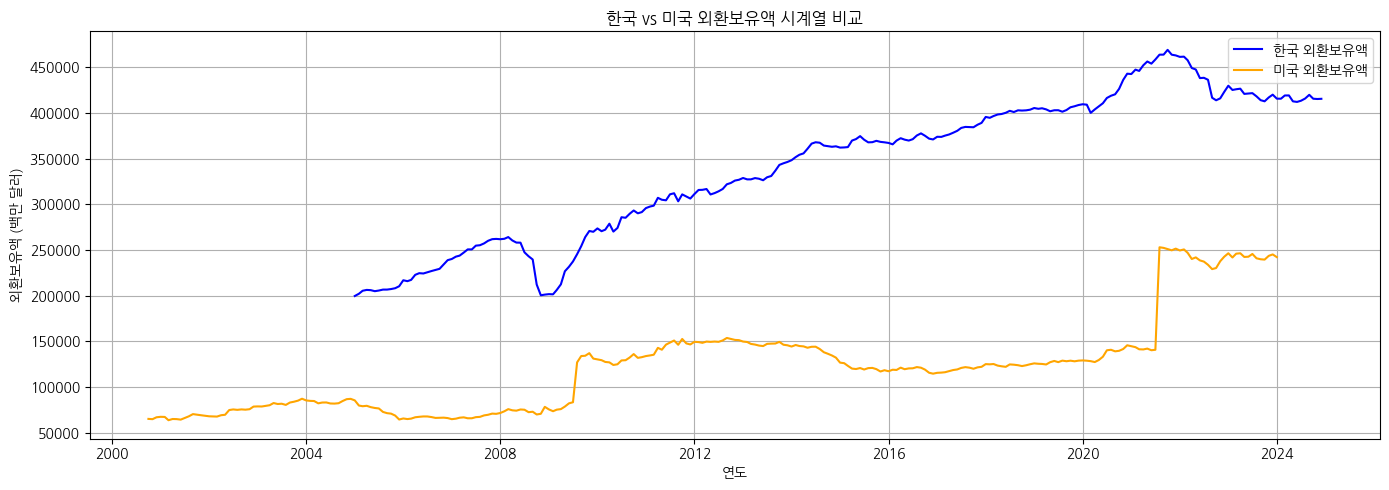

In [51]:
import matplotlib.pyplot as plt

# TIME이 datetime 타입인지 확인
df_plot = df_merged.copy()
df_plot["TIME"] = pd.to_datetime(df_plot["TIME"])

plt.figure(figsize=(14, 5))

# 한국 외환보유액
plt.plot(df_plot["TIME"], df_plot["한국 외환 보유액"], label="한국 외환보유액", color="blue")

# 미국 외환보유액
plt.plot(df_plot["TIME"], df_plot["미국 외환 보유액"], label="미국 외환보유액", color="orange")

plt.title("한국 vs 미국 외환보유액 시계열 비교")
plt.xlabel("연도")
plt.ylabel("외환보유액 (백만 달러)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()